## Librairies et chargement des données

In [2]:
# Importation des librairies principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration visuelle
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")
pd.set_option('display.max_columns', None)

# Chargement du dataset
df = pd.read_csv("aircraft_price.csv")

# Dimensions du jeu de données
print("Shape :", df.shape)

# Aperçu des premières lignes
df.head()

Shape : (517, 16)


,model_name,engine_type,engine_power,max_speed,cruise_speed,stall_speed,fuel_tank,all_eng_roc,out_eng_roc,takeoff_distance,landing_distance,empty_weight,length,wing_span,range,price
0,100 Darter (S.L. Industries),Piston,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,303.0,449.0,370.0,1300000.0
1,7 CCM Champ,Piston,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,247.0,433.0,190.0,1230000.0
2,100 Darter (S.L. Industries),Piston,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,257.0,420.0,210.0,1600000.0
3,7 AC Champ,Piston,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,257.0,420.0,210.0,1300000.0
4,100 Darter (S.L. Industries),Piston,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,257.0,420.0,175.0,1250000.0


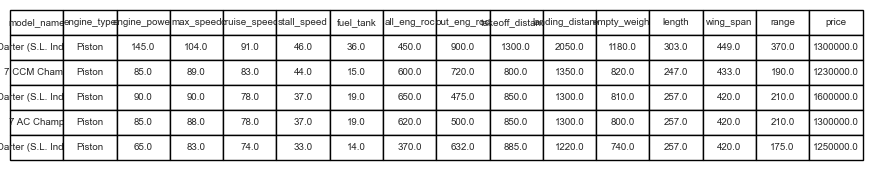

In [3]:
# Sélection des 5 premières lignes pour affichage
sample = df.head()

# Configuration de la figure
fig, ax = plt.subplots(figsize=(11, 1.5))
ax.axis('off')

# Création d'une table visuelle depuis le DataFrame
table = ax.table(
    cellText=sample.values,
    colLabels=sample.columns,
    cellLoc='center',
    loc='center'
)

# Ajustement de la taille du texte
table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(1, 1.5)

## Informations générales

In [15]:
# Types des colonnes et valeurs manquantes
df.info()

# Statistiques globales
df.describe().T

# Pourcentage de valeurs manquantes
(df.isna().mean() * 100).sort_values(ascending=False)

<class 'pandas.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_name        517 non-null    str    
 1   engine_type       517 non-null    str    
 2   engine_power      517 non-null    float64
 3   max_speed         517 non-null    float64
 4   cruise_speed      517 non-null    float64
 5   stall_speed       517 non-null    float64
 6   fuel_tank         517 non-null    float64
 7   all_eng_roc       517 non-null    float64
 8   out_eng_roc       517 non-null    float64
 9   takeoff_distance  517 non-null    float64
 10  landing_distance  517 non-null    float64
 11  empty_weight      517 non-null    float64
 12  length            517 non-null    float64
 13  wing_span         517 non-null    float64
 14  range             517 non-null    float64
 15  price             507 non-null    float64
dtypes: float64(14), str(2)
memory usage: 64.8 KB


price               1.934236
model_name          0.000000
engine_type         0.000000
engine_power        0.000000
max_speed           0.000000
cruise_speed        0.000000
stall_speed         0.000000
fuel_tank           0.000000
all_eng_roc         0.000000
out_eng_roc         0.000000
takeoff_distance    0.000000
landing_distance    0.000000
empty_weight        0.000000
length              0.000000
wing_span           0.000000
range               0.000000
dtype: float64

## Identification des types de variables

In [5]:
# Variables numériques
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Variables non numériques
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Variables numériques :", num_cols)
print("Variables catégorielles :", cat_cols)

Variables numériques : ['engine_power', 'max_speed', 'cruise_speed', 'stall_speed', 'fuel_tank', 'all_eng_roc', 'out_eng_roc', 'takeoff_distance', 'landing_distance', 'empty_weight', 'length', 'wing_span', 'range', 'price']
Variables catégorielles : ['model_name', 'engine_type']


## Analyse univariée des variables catégorielles


--- model_name ---


model_name
100 Darter (S.L. Industries)                                 45.3
7 CCM Champ                                                   0.2
7 AC Champ                                                    0.2
PA-60-700P Aerostar (preliminary)                             0.2
PA-601P pressurized Aerostar ('77 service ceiling=26,350)     0.2
                                                             ... 
500 U                                                         0.2
500 A                                                         0.2
520                                                           0.2
2180                                                          0.2
2150A Kachina                                                 0.2
Name: proportion, Length: 284, dtype: float64

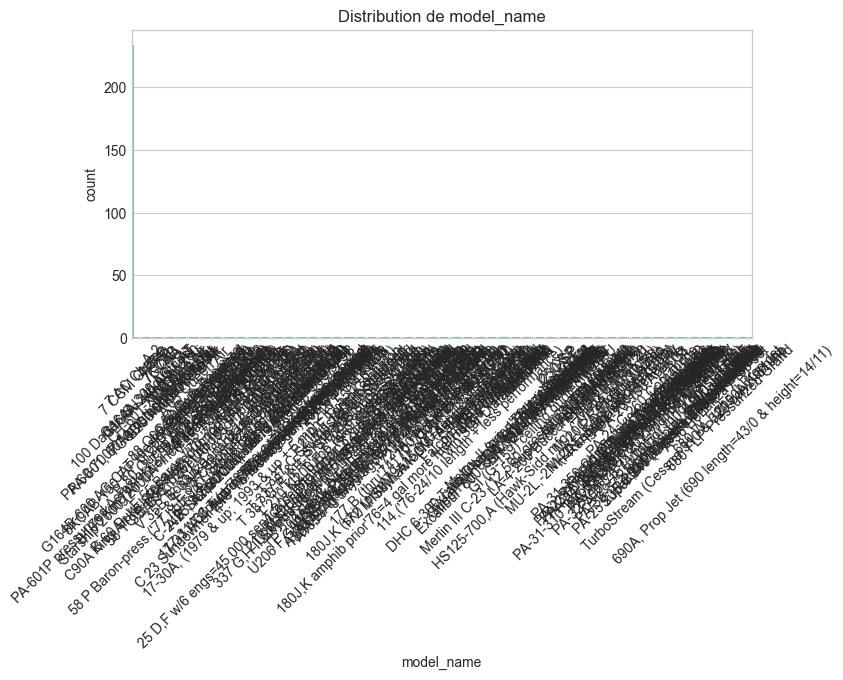


--- engine_type ---


engine_type
Piston     74.5
Jet        14.3
Propjet    11.2
Name: proportion, dtype: float64

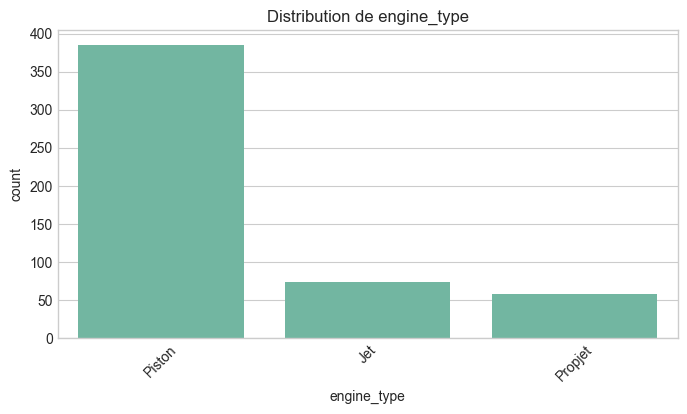

In [6]:
for col in cat_cols:
    print(f"\n--- {col} ---")
    display(df[col].value_counts(normalize=True).round(3) * 100)

    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution de {col}")
    plt.xticks(rotation=45)
    plt.show()

## Analyse univariée des variables numériques


--- engine_power ---


count      517.000000
mean       869.328820
std       1783.602771
min         60.000000
25%        200.000000
50%        285.000000
75%        550.000000
max      14750.000000
Name: engine_power, dtype: float64

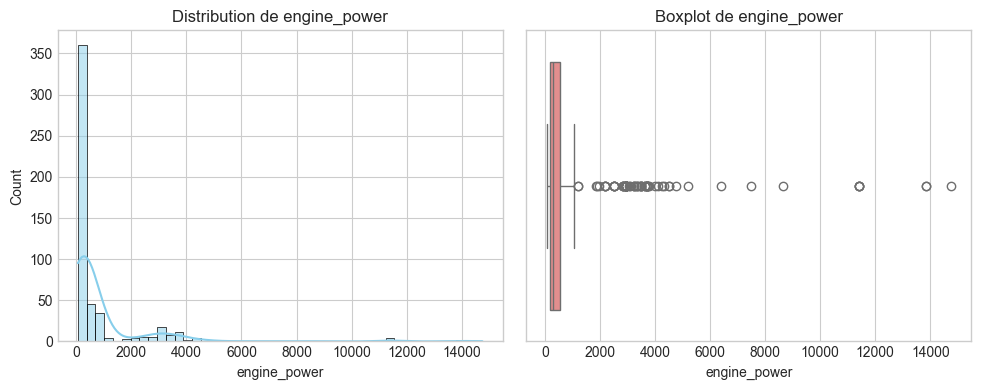


--- max_speed ---


count    517.000000
mean     212.794971
std      114.106830
min       64.000000
25%      143.000000
50%      177.000000
75%      238.000000
max      755.000000
Name: max_speed, dtype: float64

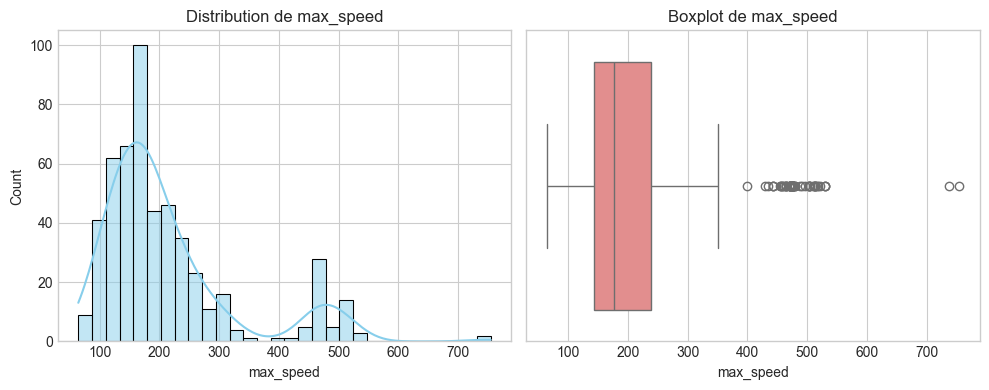


--- cruise_speed ---


count    517.000000
mean     200.177950
std      103.358089
min       70.000000
25%      131.000000
50%      169.000000
75%      229.000000
max      511.000000
Name: cruise_speed, dtype: float64

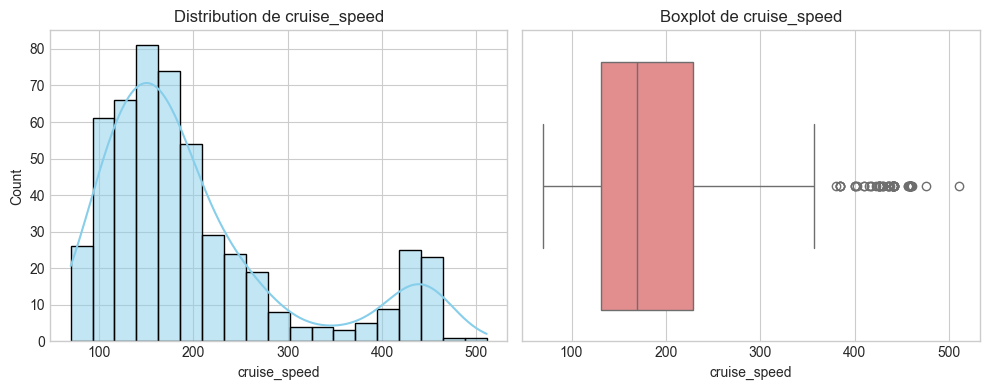


--- stall_speed ---


count    517.000000
mean      60.656673
std       16.432874
min       27.000000
25%       50.000000
50%       56.000000
75%       73.000000
max      115.000000
Name: stall_speed, dtype: float64

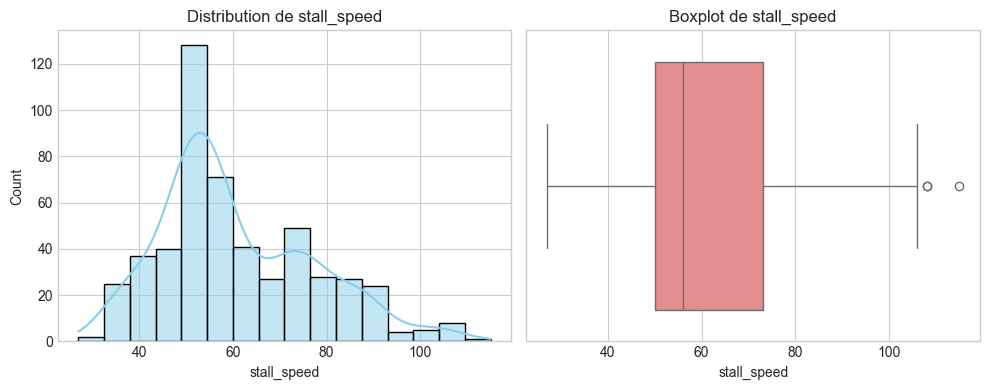


--- fuel_tank ---


count      517.000000
mean      1419.379110
std       4278.320773
min         12.000000
25%         50.000000
50%         89.000000
75%        335.000000
max      41000.000000
Name: fuel_tank, dtype: float64

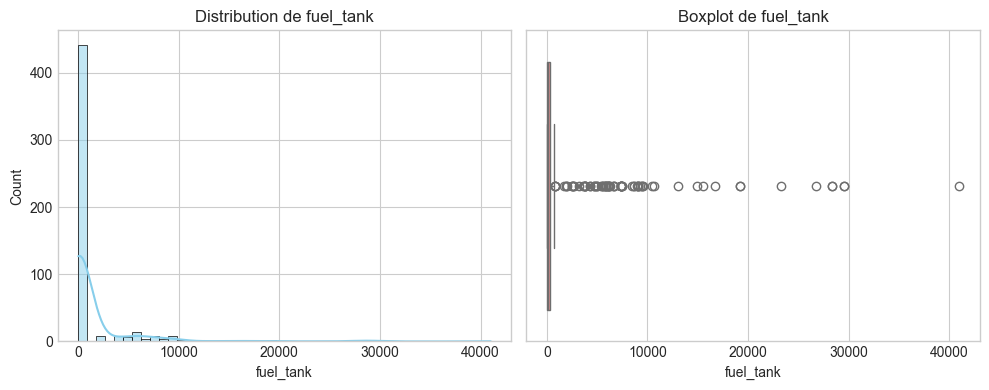


--- all_eng_roc ---


count      517.000000
mean      1717.558994
std       1453.489518
min        360.000000
25%        924.000000
50%       1200.000000
75%       1861.000000
max      11673.000000
Name: all_eng_roc, dtype: float64

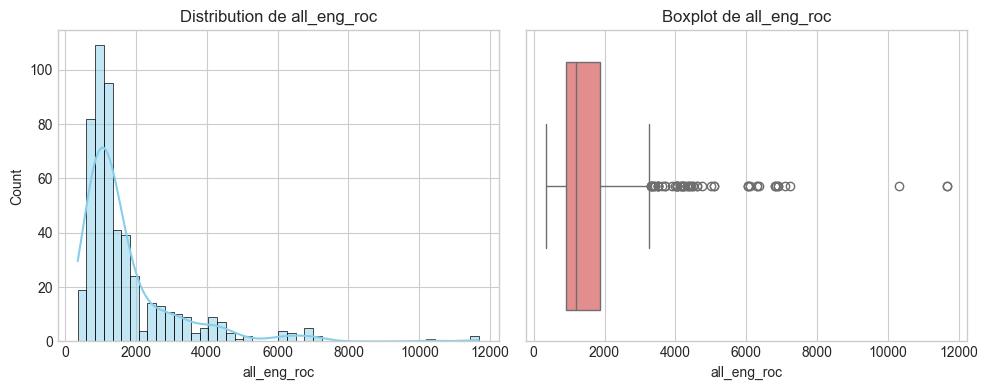


--- out_eng_roc ---


count     517.000000
mean     2047.065764
std      1123.433947
min       457.000000
25%      1365.000000
50%      1706.000000
75%      2280.000000
max      6400.000000
Name: out_eng_roc, dtype: float64

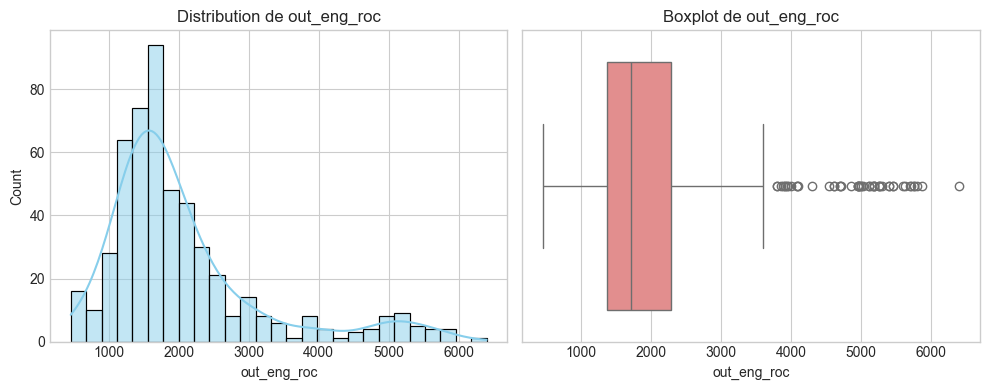


--- takeoff_distance ---


count     517.000000
mean     1732.750484
std       713.646967
min       500.000000
25%      1265.000000
50%      1525.000000
75%      2110.000000
max      4850.000000
Name: takeoff_distance, dtype: float64

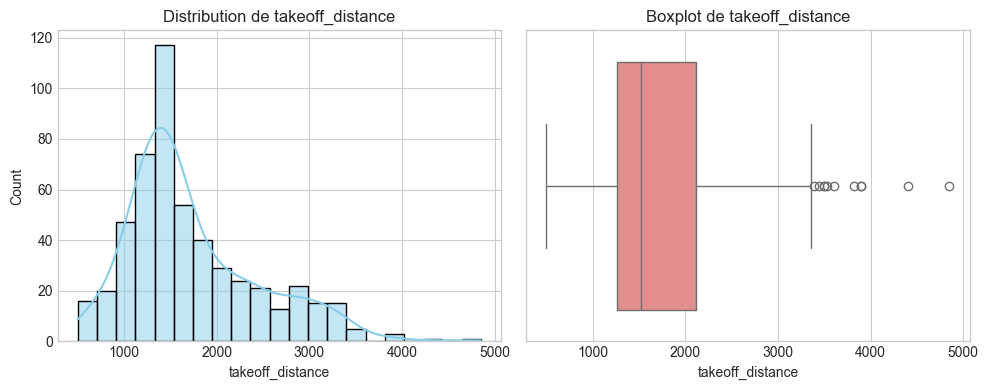


--- landing_distance ---


count      517.000000
mean      7485.489362
std      10289.442474
min        567.000000
25%       2650.000000
50%       3625.000000
75%       8800.000000
max      89400.000000
Name: landing_distance, dtype: float64

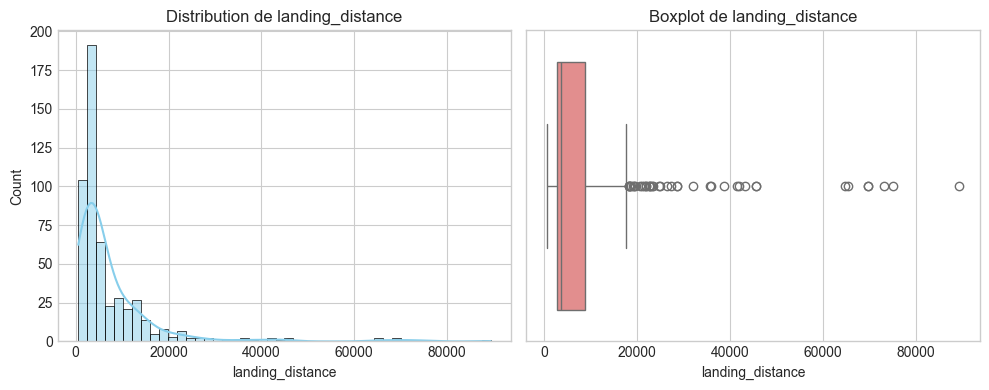


--- empty_weight ---


count      517.000000
mean      4377.445841
std       5649.707682
min         23.000000
25%       1575.000000
50%       2286.500000
75%       5164.000000
max      46800.000000
Name: empty_weight, dtype: float64

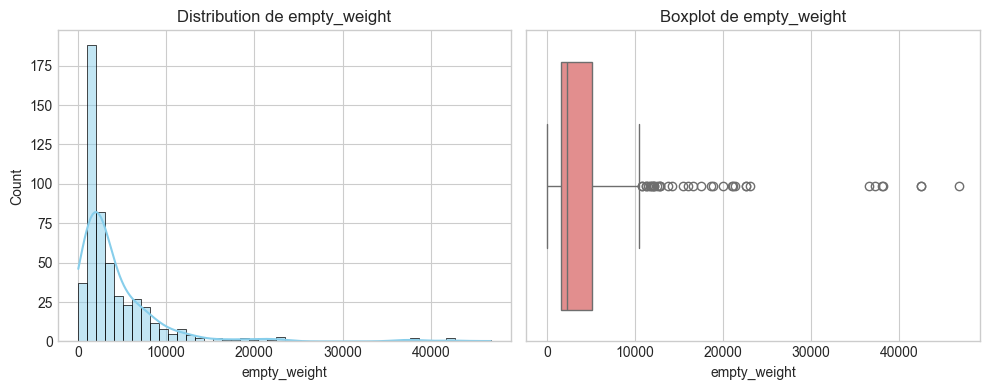


--- length ---


count     517.000000
mean      387.247582
std       140.440740
min       211.000000
25%       302.000000
50%       337.000000
75%       426.000000
max      1157.000000
Name: length, dtype: float64

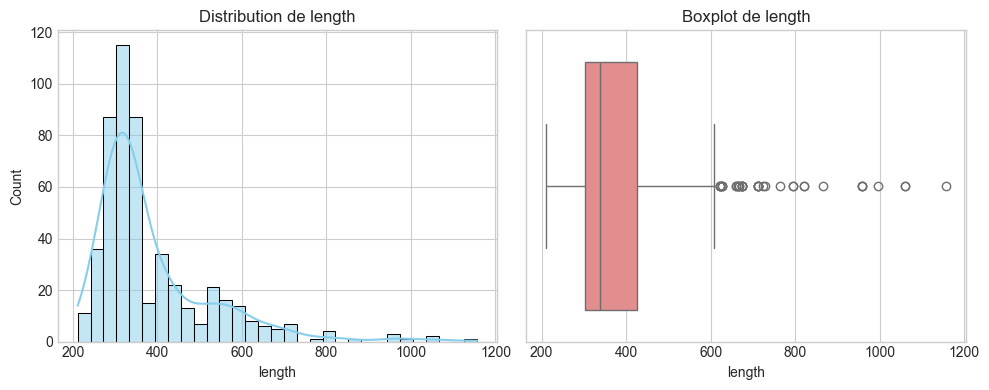


--- wing_span ---


count     517.000000
mean      472.535783
std       102.540298
min       192.000000
25%       420.000000
50%       438.000000
75%       507.000000
max      1122.000000
Name: wing_span, dtype: float64

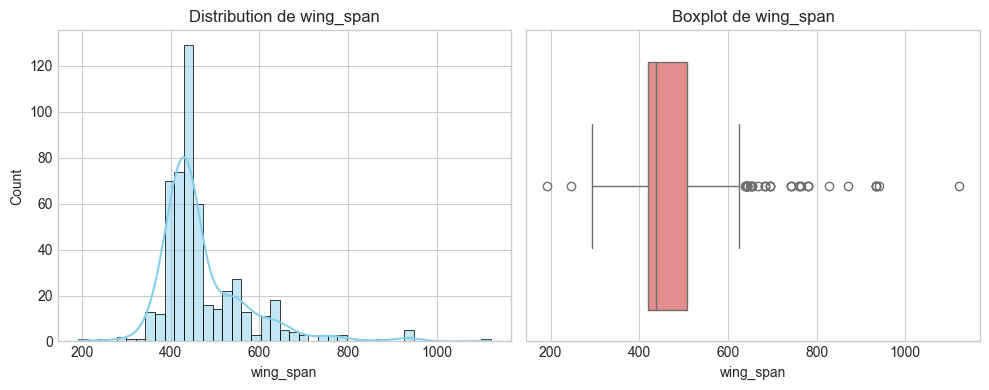


--- range ---


count     517.000000
mean      911.448743
std       696.429643
min       117.000000
25%       517.000000
50%       713.000000
75%      1100.000000
max      6500.000000
Name: range, dtype: float64

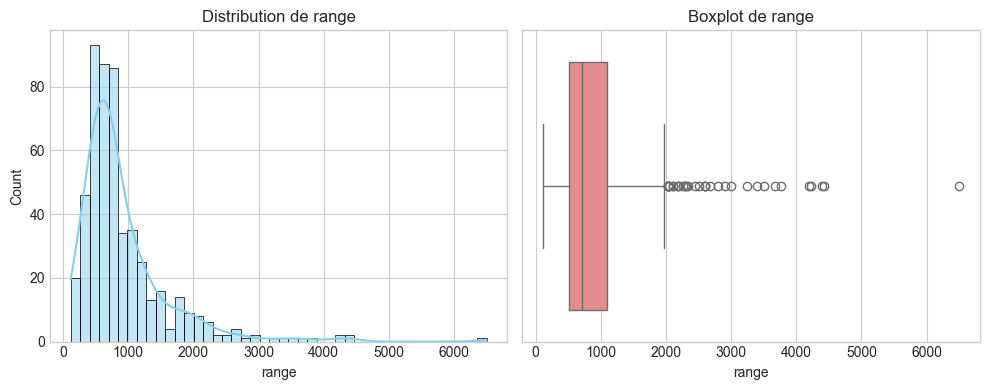


--- price ---


count    5.070000e+02
mean     2.362673e+06
std      1.018731e+06
min      6.500000e+05
25%      1.600000e+06
50%      2.000000e+06
75%      2.950000e+06
max      5.100000e+06
Name: price, dtype: float64

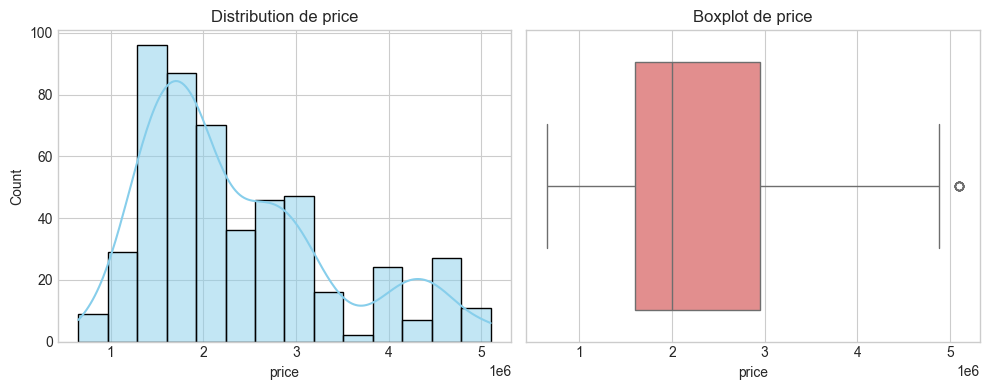

In [7]:
for col in num_cols:
    print(f"\n--- {col} ---")
    display(df[col].describe())

    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Distribution de {col}")
    sns.boxplot(x=df[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()

## Détection des valeurs aberrantes (IQR)

In [8]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column} → {len(outliers)} valeurs aberrantes détectées ({round(len(outliers)/len(data)*100,2)}%)")
    return outliers

for col in num_cols:
    detect_outliers_iqr(df, col)

engine_power → 75 valeurs aberrantes détectées (14.51%)
max_speed → 59 valeurs aberrantes détectées (11.41%)
cruise_speed → 64 valeurs aberrantes détectées (12.38%)
stall_speed → 3 valeurs aberrantes détectées (0.58%)
fuel_tank → 80 valeurs aberrantes détectées (15.47%)
all_eng_roc → 58 valeurs aberrantes détectées (11.22%)
out_eng_roc → 51 valeurs aberrantes détectées (9.86%)
takeoff_distance → 11 valeurs aberrantes détectées (2.13%)
landing_distance → 40 valeurs aberrantes détectées (7.74%)
empty_weight → 37 valeurs aberrantes détectées (7.16%)
length → 38 valeurs aberrantes détectées (7.35%)
wing_span → 42 valeurs aberrantes détectées (8.12%)
range → 35 valeurs aberrantes détectées (6.77%)
price → 9 valeurs aberrantes détectées (1.74%)


## Synthèse de l'analyse univariée

In [9]:
summary = pd.DataFrame({
    'type': ['numérique' if col in num_cols else 'catégorielle' for col in df.columns],
    'missing_%': df.isna().mean().round(3) * 100,
    'n_unique': df.nunique(),
    'mean': [df[col].mean() if col in num_cols else None for col in df.columns],
    'std': [df[col].std() if col in num_cols else None for col in df.columns],
})
summary

,type,missing_%,n_unique,mean,std
model_name,catégorielle,0.0,284,NaN,NaN
engine_type,catégorielle,0.0,3,NaN,NaN
engine_power,numérique,0.0,113,8.693288e+02,1.783603e+03
max_speed,numérique,0.0,208,2.127950e+02,1.141068e+02
cruise_speed,numérique,0.0,188,2.001779e+02,1.033581e+02
stall_speed,numérique,0.0,69,6.065667e+01,1.643287e+01
fuel_tank,numérique,0.0,173,1.419379e+03,4.278321e+03
all_eng_roc,numérique,0.0,260,1.717559e+03,1.453490e+03
out_eng_roc,numérique,0.0,277,2.047066e+03,1.123434e+03
takeoff_distance,numérique,0.0,242,1.732750e+03,7.136470e+02


## Corrélation entre variables numériques

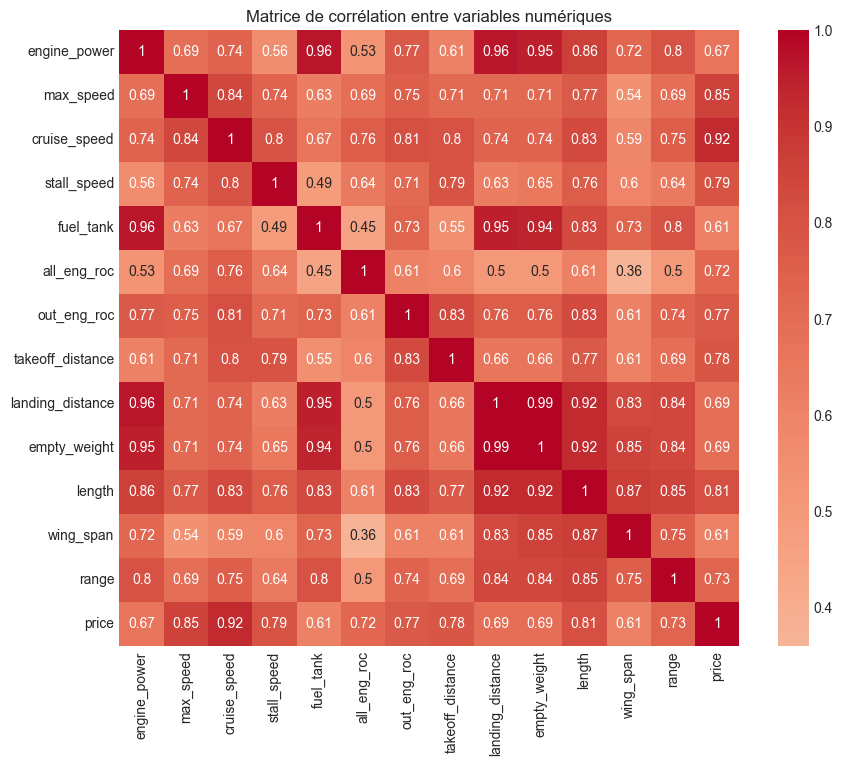

In [10]:
# Matrice de corrélation
corr_matrix = df[num_cols].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation entre variables numériques")
plt.show()

## Relation entre variables numériques et la target variable

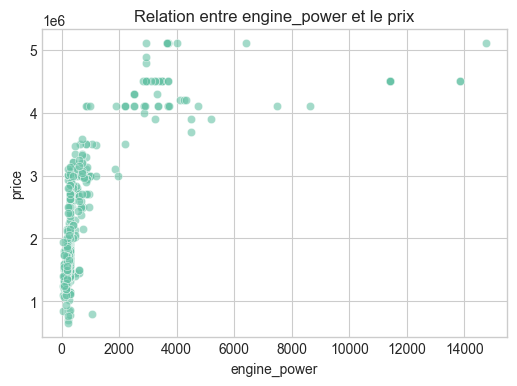

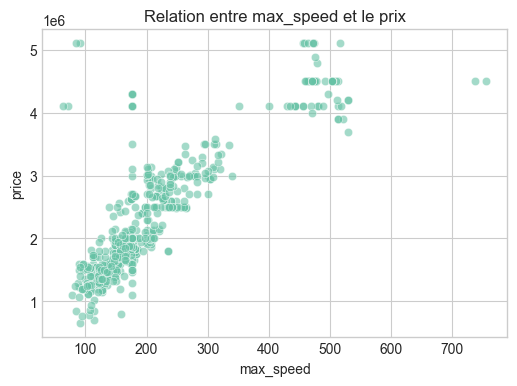

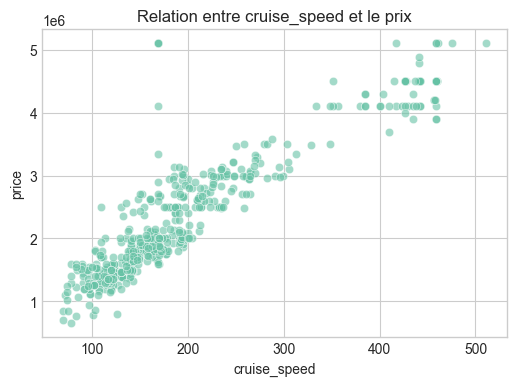

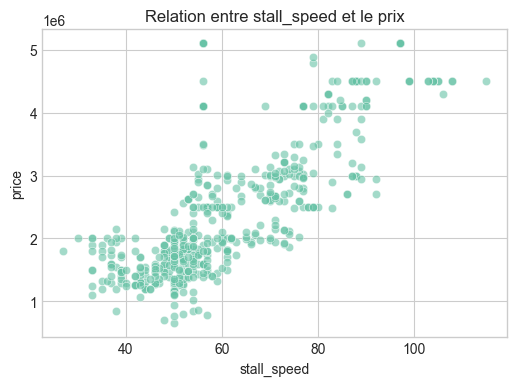

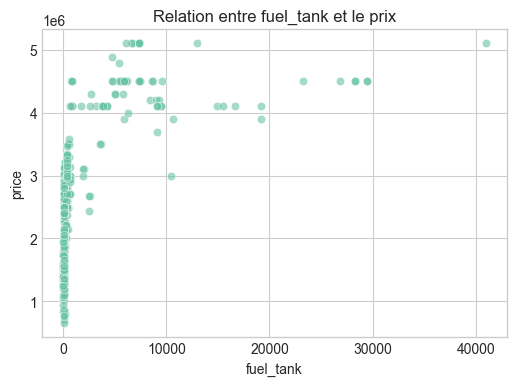

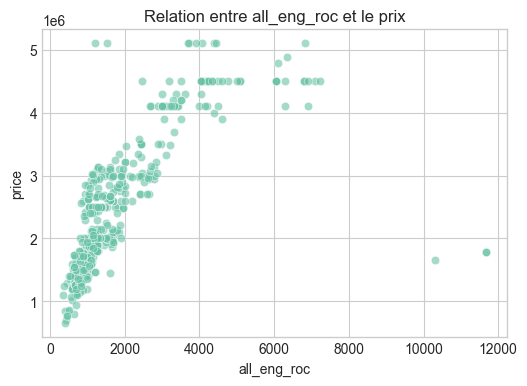

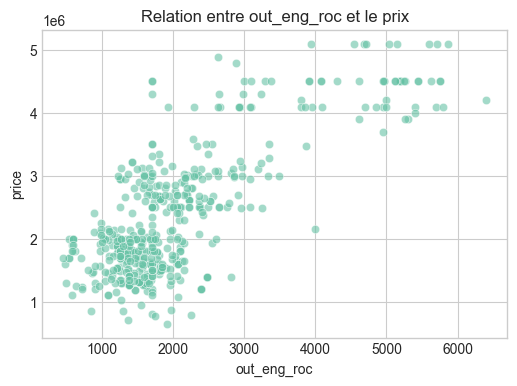

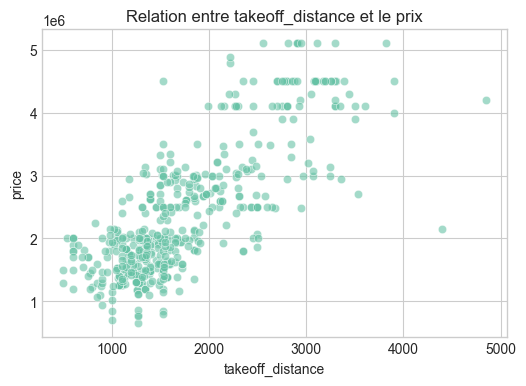

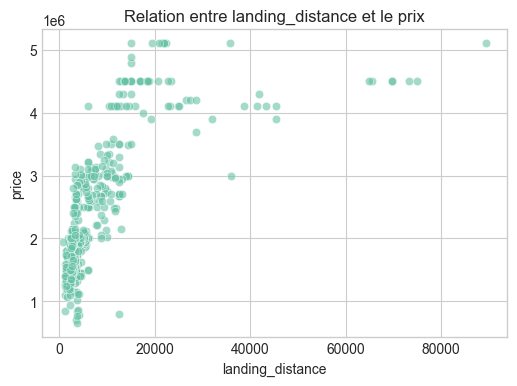

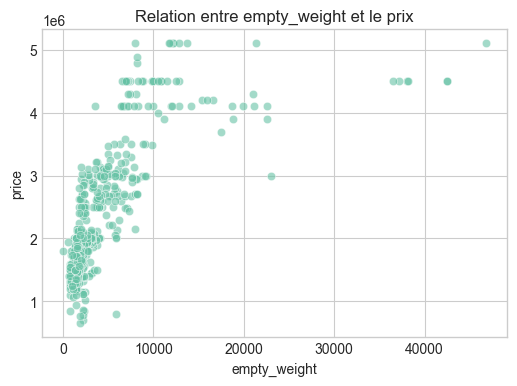

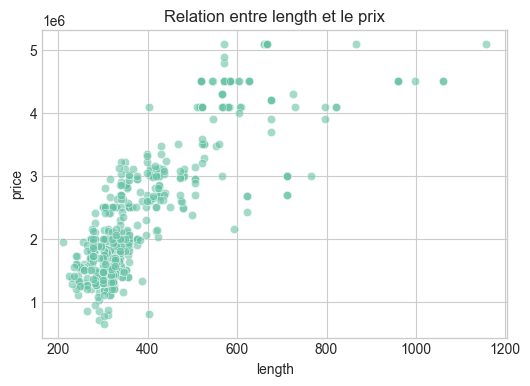

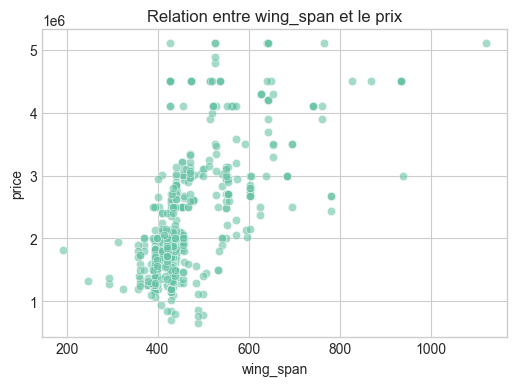

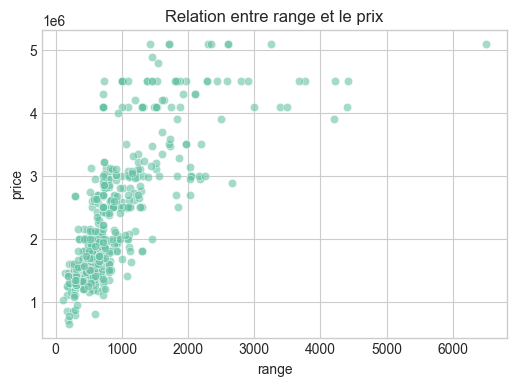

In [11]:
# Visualisation de quelques relations clés avec le prix
important_numeric_features = [col for col in num_cols if col != 'price']

for col in important_numeric_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y='price', alpha=0.6)
    plt.title(f"Relation entre {col} et le prix")
    plt.show()

## Relation entre catégorielles et target variable

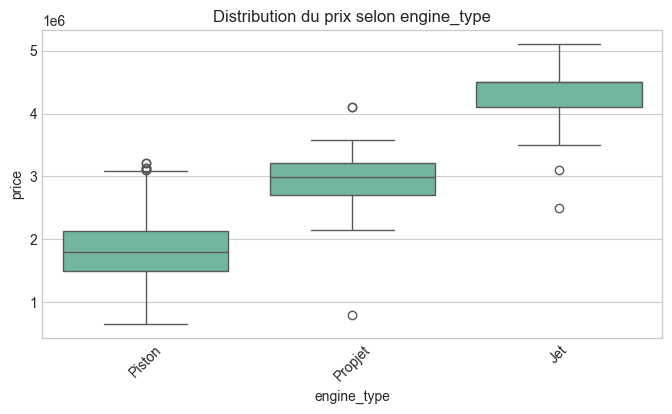

In [12]:
for col in cat_cols:
    if df[col].nunique() < 20:  
        plt.figure(figsize=(8,4))
        sns.boxplot(x=col, y='price', data=df)
        plt.title(f"Distribution du prix selon {col}")
        plt.xticks(rotation=45)
        plt.show()

## Analyse de la relation avec la variable cible

price               1.000000
cruise_speed        0.916708
max_speed           0.853201
length              0.813374
stall_speed         0.788128
takeoff_distance    0.781583
out_eng_roc         0.771138
range               0.731682
all_eng_roc         0.716527
empty_weight        0.692141
landing_distance    0.685806
engine_power        0.673969
wing_span           0.611242
fuel_tank           0.607639
Name: price, dtype: float64

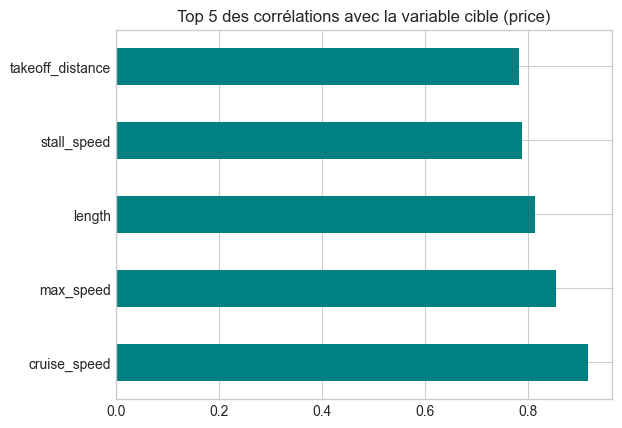

In [ ]:
target = 'price'

# Garde que les colonnes numériques
num_df = df.select_dtypes(include=np.number)

# Vérifions que la cible est bien dans ces colonnes
if target in num_df.columns:
    corr_target = num_df.corr()[target].sort_values(ascending=False)
    display(corr_target)

    # Visualisation top 5
    corr_target.drop(target).head(5).plot(kind='barh', color='teal')
    plt.title("Top 5 des corrélations avec la variable cible (price)")
    plt.show()
else:
    print(f"La variable cible '{target}' n'est pas numérique. Vérifie son type ou convertis-la en float/int.")